<a href="https://colab.research.google.com/github/asadbilal29/titanic-survival-prediction/blob/main/titanic_logistic_model.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic Survival Prediction using Logistic Regression

This project uses the Titanic dataset to predict passenger survival based on various features. We preprocess the data, build a logistic regression model, and evaluate its accuracy.


## Step 1: Import Libraries and Load Dataset

We import all necessary libraries and load the Titanic dataset (`train.csv`) to begin our analysis.



In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# See summary of the dataset
print(df.info())

# See number of missing values per column
print("\nMissing values:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

In [ ]:
!pip install seaborn



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



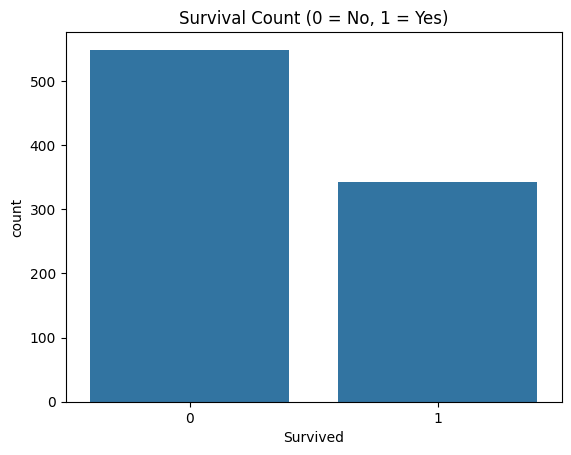

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()



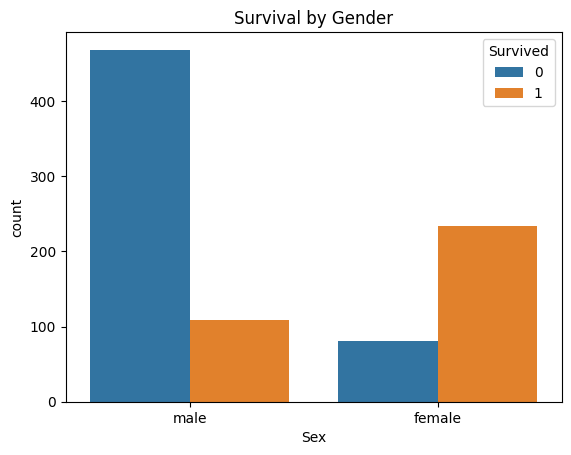

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()



## Step 2: Data Cleaning
Remove unnecessary columns and handle missing values.


In [ ]:
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-9-f3c0c36ea331>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-9-f3c0c36ea331>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## Step 3: Feature Engineering
Convert categorical features like 'Sex' and 'Embarked' into numeric.


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
print(df.head())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
3            4         1       1    1  35.0      1      0  53.1000         0
4            5         0       3    0  35.0      0      0   8.0500         0
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']


## Step 4: Train-Test Split
We’ll split the dataset for training and testing.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Train Logistic Regression Model
We train the model using scikit-learn.


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Step 6: Evaluate the Model
Use accuracy score to check model performance.


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7988826815642458


## Step 7: Save the Trained Model
Export the model using `pickle` to reuse it later.


In [ ]:
import joblib

# Save model to a file
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']

In [ ]:
from google.colab import files

files.download('logistic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>